In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('/content/ipl_data.csv')

In [10]:
print(df.head())


   match_id           date                                         venue  \
0         1  March 26,2022                      Wankhede Stadium, Mumbai   
1         2  March 27,2022                     Brabourne Stadium, Mumbai   
2         3  March 27,2022            Dr DY Patil Sports Academy, Mumbai   
3         4  March 28,2022                      Wankhede Stadium, Mumbai   
4         5  March 29,2022  Maharashtra Cricket Association Stadium,Pune   

       team1      team2  stage toss_winner toss_decision  first_ings_score  \
0    Chennai    Kolkata  Group     Kolkata         Field               131   
1      Delhi     Mumbai  Group       Delhi         Field               177   
2   Banglore     Punjab  Group      Punjab         Field               205   
3    Gujarat    Lucknow  Group     Gujarat         Field               158   
4  Hyderabad  Rajasthan  Group   Hyderabad         Field               210   

   first_ings_wkts  second_ings_score  second_ings_wkts match_winner   won

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [12]:
print(df.describe(include='all'))


         match_id           date                     venue     team1  \
count   74.000000             74                        74        74   
unique        NaN             62                         6         9   
top           NaN  March 27,2022  Wankhede Stadium, Mumbai  Banglore   
freq          NaN              2                        21        16   
mean    37.500000            NaN                       NaN       NaN   
std     21.505813            NaN                       NaN       NaN   
min      1.000000            NaN                       NaN       NaN   
25%     19.250000            NaN                       NaN       NaN   
50%     37.500000            NaN                       NaN       NaN   
75%     55.750000            NaN                       NaN       NaN   
max     74.000000            NaN                       NaN       NaN   

            team2  stage toss_winner toss_decision  first_ings_score  \
count          74     74          74            74         74.0

In [13]:
print(df.isnull().sum())

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64


In [15]:
# Total Matches
print("Total Matches:", df.shape[0])

# Wins by each team
df['match_winner'].value_counts()


Total Matches: 74


,count
match_winner,
Gujarat,12
Rajasthan,10
Banglore,9
Lucknow,9
Punjab,7
Delhi,7
Kolkata,6
Hyderabad,6
Chennai,4


In [18]:
# Toss decision counts
toss_counts = df['toss_decision'].value_counts()
print("Toss Decision Counts:")
print(toss_counts)
print()

# Toss decision percentages
toss_percent = (toss_counts / toss_counts.sum()) * 100
print("Toss Decision Percentages:")
print(toss_percent.round(2))
print()


Toss Decision Counts:
toss_decision
Field    59
Bat      15
Name: count, dtype: int64

Toss Decision Percentages:
toss_decision
Field    79.73
Bat      20.27
Name: count, dtype: float64



In [19]:
# Matches where toss winner also won
toss_effect = df[df['toss_winner'] == df['match_winner']]
total_matches = df.shape[0]
matches_toss_win_equals_match_win = toss_effect.shape[0]

print(f"Matches where toss winner also won: {matches_toss_win_equals_match_win} "
      f"({(matches_toss_win_equals_match_win / total_matches) * 100:.2f}%)")


Matches where toss winner also won: 36 (48.65%)


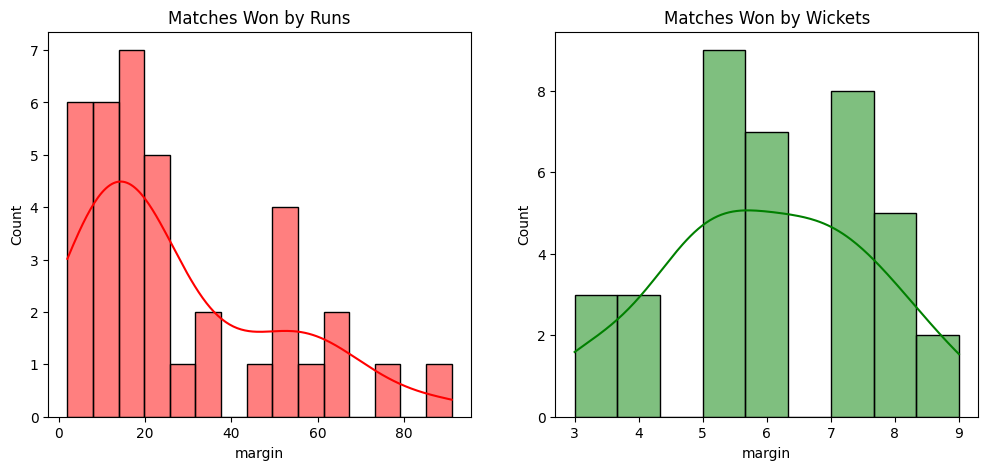

In [29]:
# Distribution of win margins

df_runs = df[df['won_by'] == 'Runs']
df_wickets = df[df['won_by'] == 'Wickets']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_runs['margin'], bins=15, kde=True, color='red')
plt.title("Matches Won by Runs")

plt.subplot(1, 2, 2)
sns.histplot(df_wickets['margin'], bins=9, kde=True, color='green')
plt.title("Matches Won by Wickets")
plt.show()



In [23]:
# topper players
top_players = df['player_of_the_match'].value_counts().head(10)

print("Top 10 Players of the Match Awards:")
for player, count in top_players.items():
    print(f"{player}: {count} times")


Top 10 Players of the Match Awards:
Kuldeep Yadav: 4 times
Jos Buttler: 3 times
Wanindu Hasaranga: 2 times
Umesh Yadav: 2 times
Quinton de Kock: 2 times
Shubman Gill: 2 times
Avesh Khan: 2 times
Dinesh Karthik: 2 times
Hardik Pandya: 2 times
Rahul Tripathi: 2 times


In [24]:
# Indiviual scores of top players
top_scores = df.groupby('top_scorer')['highscore'].max().sort_values(ascending=False).head(10)

print("Top 10 Individual Scores:")
for player, score in top_scores.items():
    print(f"{player}: {score} runs")


Top 10 Individual Scores:
Quinton de Kock: 140 runs
Jos Buttler: 116 runs
Rajat Patidar: 112 runs
KL Rahul: 103 runs
Ruturaj Gaikwad: 99 runs
Faf du Plessis: 96 runs
Shubman Gill: 96 runs
Shivam Dube: 95 runs
David Miller: 94 runs
Moeen Ali: 93 runs


In [27]:
# top bowlers
df[['wickets_taken', 'runs_given']] = df['best_bowling_figure'].str.split('--', expand=True)

df['wickets_taken'] = df['wickets_taken'].astype(int)
df['runs_given'] = df['runs_given'].astype(int)

top_bowling = df[['best_bowling', 'wickets_taken']].sort_values(by='wickets_taken', ascending=False).drop_duplicates().head(10)

print("Top 10 Best Bowling Figures:")
for index, row in top_bowling.iterrows():
    print(f"{row['best_bowling']}: {row['wickets_taken']} wickets")


Top 10 Best Bowling Figures:
Yuzvendra Chahal: 5 wickets
Umran Malik: 5 wickets
Jasprit Bumrah: 5 wickets
Wanindu Hasaranga: 5 wickets
Daniel Sams: 4 wickets
Odean Smith: 4 wickets
Lockie Ferguson: 4 wickets
Avesh Khan: 4 wickets
Umesh Yadav: 4 wickets
Wanindu Hasaranga: 4 wickets


In [28]:
# saving EDA data
df.to_csv("ipl_2022_cleaned.csv", index=False)

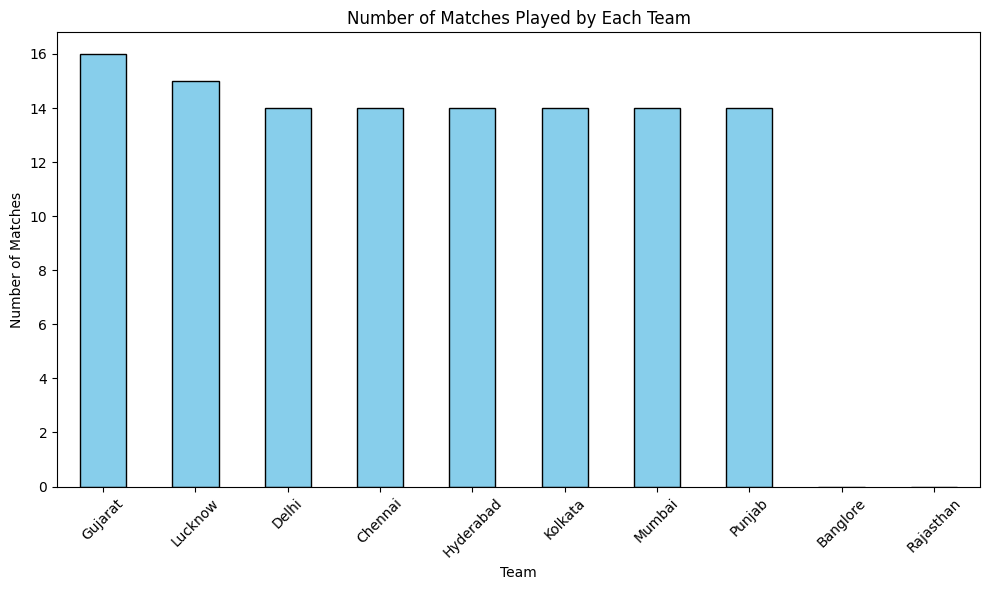

In [31]:

# Count how many times each team appears in team1 and team2
team_counts = df['team1'].value_counts() + df['team2'].value_counts()

# Sort values for better visualization
team_counts = team_counts.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
team_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


